In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
import pathpy as pp
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/wake_effect/turbine_distances')
from interaction_matrix import interaction_matrix

In [3]:
#haver_interaction = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/haversine_interaction.csv')
#euclid_interaction = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/euclid_interaction.csv')
#haver_interaction_full = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/haversine_interaction_full.csv')
#euclid_interaction_full = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/euclid_interaction_full.csv')
coord = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/Pos_WTG_Brasil.csv')

In [4]:
#haver_interaction.set_index('Unnamed: 0', inplace=True)
#euclid_interaction.set_index('Unnamed: 0', inplace=True)
#haver_interaction_full.set_index('Unnamed: 0', inplace=True)
#euclid_interaction_full.set_index('WTG', inplace=True)

In [4]:
matrix = interaction_matrix(coord)

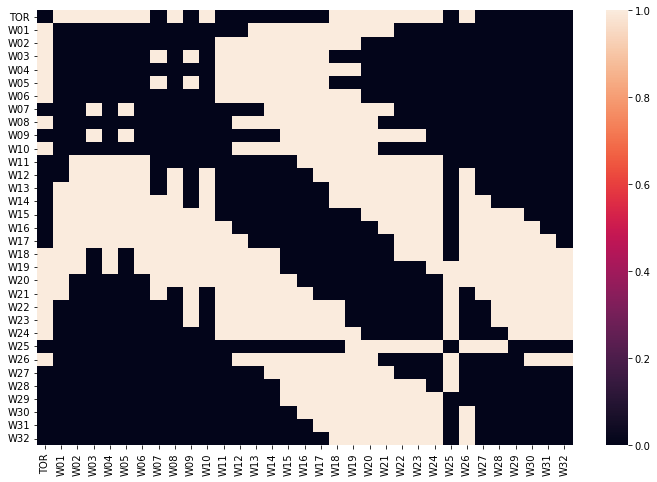

In [5]:
haver_interaction_full = matrix.calculate_haver(False, True)

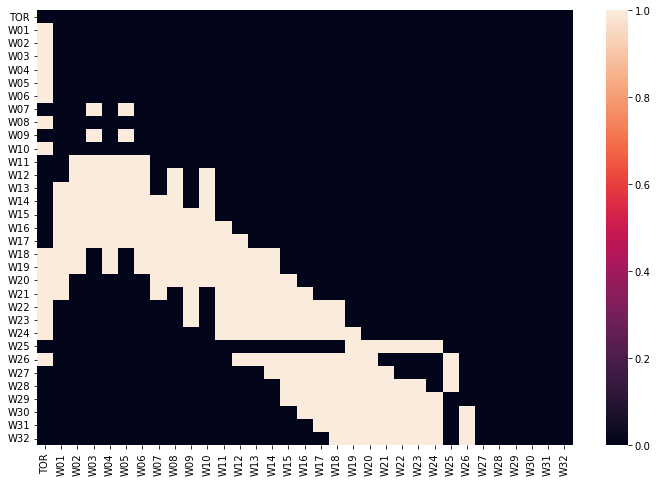

In [6]:
haver_interaction_tri = matrix.calculate_haver(True, True)

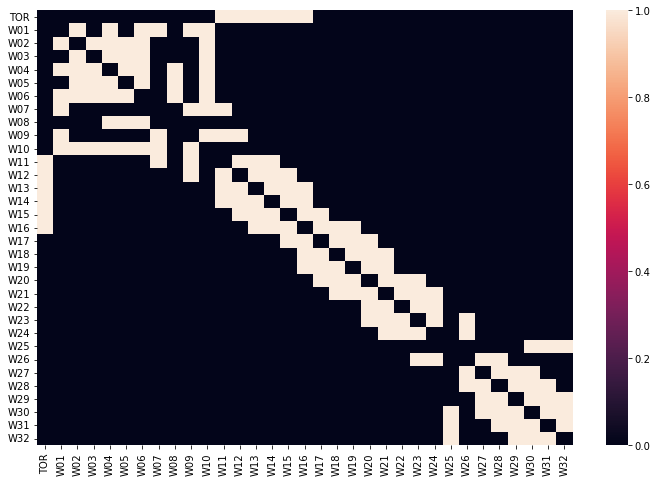

In [10]:
euclid_interaction_full = matrix.calculate_euclidean(threshold=0.004, tri=False, plot=True)

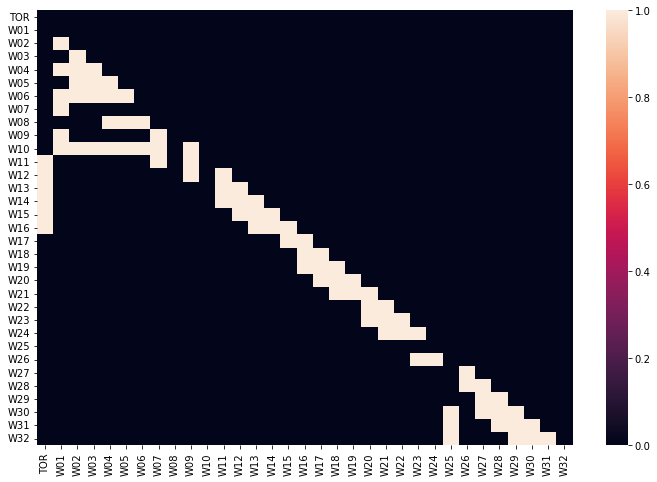

In [11]:
euclid_interaction_tri = matrix.calculate_euclidean(threshold=0.004, tri=True, plot=True)

## Building the Network

if 1 then .add_edge between the two nodes (turbines) else nothing

In [12]:
def build_network(interaction, directed=bool):
    
    graph = pp.Network(directed=directed)
    
    cnt = 0
    for row in range(0, 33):
        for turb1 in interaction.iloc[[row]].index:
            for int, adj_turb in zip(interaction.values[row], interaction.columns):
                cnt += 1
                if int == 1:
                    graph.add_edge(turb1, adj_turb)
                else:
                    pass

    print(cnt)
    return graph

In [13]:
haver_full = build_network(haver_interaction_full, True)
haver_tri = build_network(haver_interaction_tri, True)

1089
1089


In [14]:
haver_tri

In [32]:
haver_full

In [16]:
euclid_full = build_network(euclid_interaction_full, True)
euclid_tri = build_network(euclid_interaction_tri, True)

1089
1089


In [17]:
euclid_tri

In [19]:
euclid_full

## Centrality Measures

 - Degree centrality: How many edges does a node have?
    - A node is central if it has a high degree 
    - Out degree, in-degree, or the sum of both
 - Closeness centrality: Indicates how close a node is to all other nodes in the network
    - Calculated as the average of the shortest path length from the node to every other node in the network

In [20]:
def centrality_measures(graph):
    # Calculates betweeness centrality of all nodes
    betweenness = pp.algorithms.centralities.betweenness(graph)
    # Calculates degree centrality of all nodes
    degree = pp.algorithms.centralities.degree(graph)
    # Calculates closeness centrality of all nodes
    closeness = pp.algorithms.centralities.closeness(graph)
    # . . .
    distance_matrix = pp.algorithms.centralities.distance_matrix(graph)
    # . . .
    #rank_centrality = pp.algorithms.centralities.rank_centralities(graph)

    return betweenness, degree, closeness, distance_matrix

In [21]:
def plotter(measure, name):

    df = pd.DataFrame.from_dict(
        measure, orient='index', columns=['measure'])
    
    plt.figure(figsize=(14, 7))
    plt.title(name)
    sns.barplot(x=df.index, y=df.measure, palette='deep')
    plt.xticks(rotation=45)
    plt.xlabel('Turbine')
    plt.ylabel('Count')
    plt.show()

In [39]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_tri)

2022-01-14 16:02:41 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-14 16:02:41 [Severity.INFO]	Calculating closeness in network ...
2022-01-14 16:02:41 [Severity.INFO]	finished.


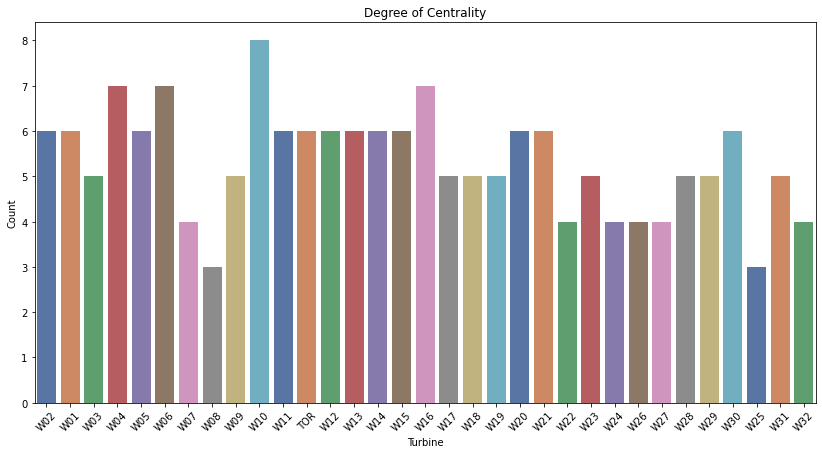

In [40]:
plotter(degree, 'Degree of Centrality')

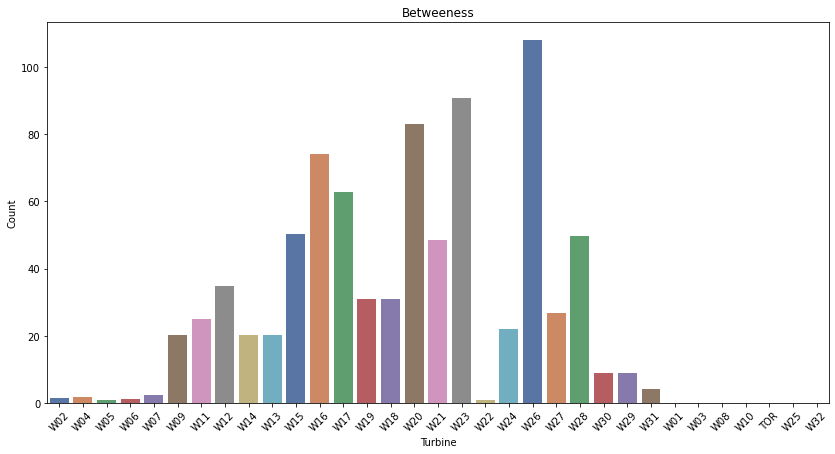

In [65]:
plotter(betweenness, 'Betweeness')

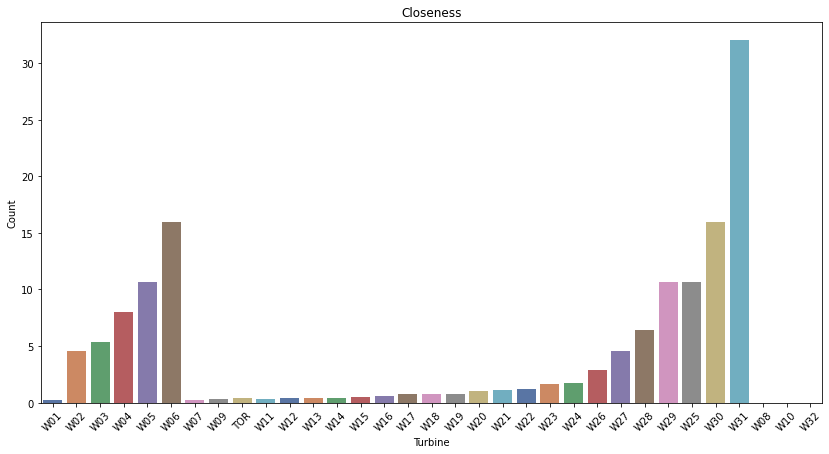

In [66]:
plotter(closeness, 'Closeness')

In [78]:
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='indegree')}")
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='outdegree')}")

Avg degree: 2.6666666666666665
Avg degree: 2.6666666666666665


In [68]:
# Haversine Distances
betweenness_h, degree_h, closeness_h, distance_matrix_h = centrality_measures(haver_full)

2022-01-12 16:18:35 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-12 16:18:35 [Severity.INFO]	Calculating closeness in network ...
2022-01-12 16:18:35 [Severity.INFO]	finished.


In [ ]:
print(f"Avg degree: {pp.statistics.mean_degree(haver_graph, degree='indegree')}")

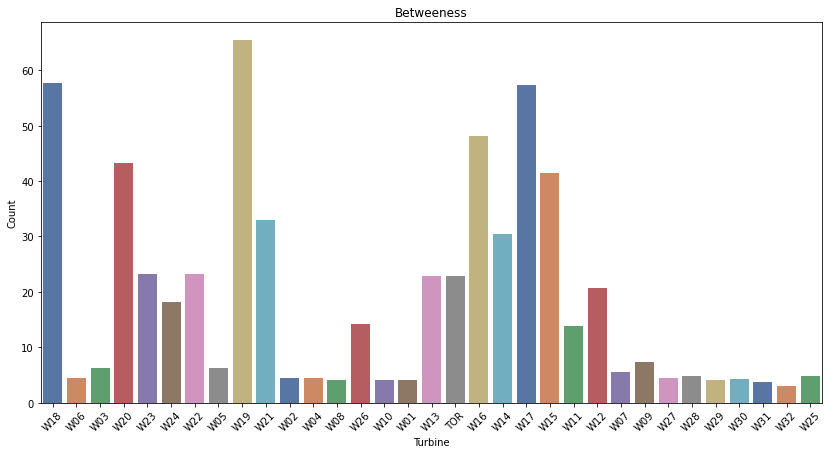

In [70]:
plotter(betweenness_h, 'Betweeness')

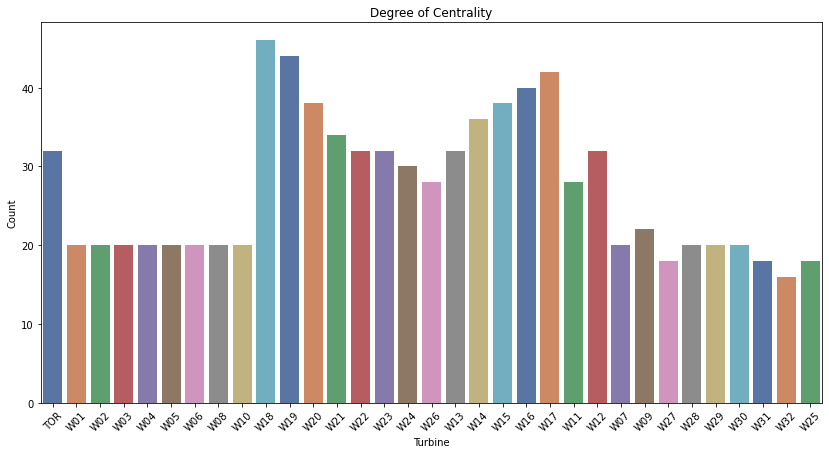

In [71]:
plotter(degree_h, 'Degree of Centrality')

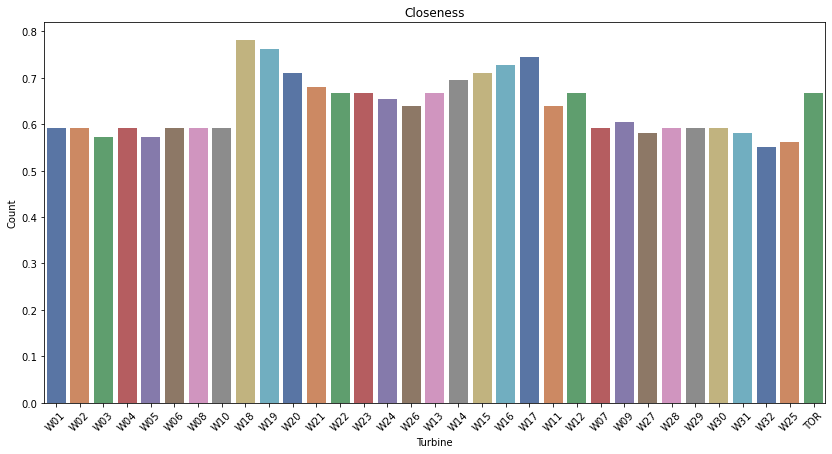

In [72]:
plotter(closeness_h, 'Closeness')